<a href="https://colab.research.google.com/github/deerow22/drafts/blob/main/drafts/PandasReview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#NOTE: you do NOT need to mount your google drive

#standard imports
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# create one dataframe to work with

#random seed so all our numbers are the same
np.random.seed(seed = 11)
#create fake data
ids = np.random.randint(1000, 2000, 10)
signal_strength = np.random.randint(0, 100, 10)
orbital_periods = np.random.randint(.3,15,10)
#put fake data into a dictionary
data_dictionary = {'ID':ids, 'Power':signal_strength, 'Period':orbital_periods}
#put data dictionary into a dataframe
df_1 = pd.DataFrame(data_dictionary)
df_1

,ID,Power,Period
0,1921,82,10
1,1703,24,5
2,1080,92,5
3,1091,48,7
4,1337,32,4
5,1951,45,1
6,1269,4,11
7,1332,34,8
8,1673,12,8
9,1583,1,1


In [ ]:
# create a second dataframe

#random seed so all our numbers are the same
np.random.seed(seed = 22)
#create fake data
ids_2 = np.random.randint(1000, 2000, 10)
signal_strength_2 = np.random.randint(0, 100, 10)
orbital_periods_2 = np.random.randint(.3,15,10)
#put fake data into a dictionary
data_dictionary_2 = {'ID':ids_2, 'Power':signal_strength_2, 'Period':orbital_periods_2}
#put data dictionary into a dataframe
df_2 = pd.DataFrame(data_dictionary_2)
df_2

,ID,Power,Period
0,1885,95,8
1,1132,93,8
2,1812,18,5
3,1960,14,11
4,1356,45,4
5,1358,88,2
6,1502,93,13
7,1491,39,2
8,1596,34,1
9,1904,41,6


# Add a column

In [ ]:
#first we want to know which rows came from which dataframe
#(b/c each dataframe is from a different sector)
# so we need to add a column for sector

# make an array of sector values that is the same length as the df we'll add to
col_for_df_1 = np.repeat(14, len(df_1))
# now add that array to df_1
df_1['Sector'] = col_for_df_1
# see the changes
df_1

,ID,Power,Period,Sector
0,1921,82,10,14
1,1703,24,5,14
2,1080,92,5,14
3,1091,48,7,14
4,1337,32,4,14
5,1951,45,1,14
6,1269,4,11,14
7,1332,34,8,14
8,1673,12,8,14
9,1583,1,1,14


In [ ]:
# do the same for df_2

col_for_df_2 = np.repeat(15, len(df_2))
df_2['Sector'] = col_for_df_2
df_2

,ID,Power,Period,Sector
0,1885,95,8,15
1,1132,93,8,15
2,1812,18,5,15
3,1960,14,11,15
4,1356,45,4,15
5,1358,88,2,15
6,1502,93,13,15
7,1491,39,2,15
8,1596,34,1,15
9,1904,41,6,15


# Combine dataframes into one df

In [ ]:
# decide between merge, append, and different "join" types available --depends on desired outcome
# since the rows in each df are _truly unique_ we want to simply append them
# if they had matching target data between the two dfs we would want to do something different

#sanity check using lenghts of dfs
print('Length of df-1: {} \nLength of df-2: {}'.format(len(df_1), len(df_2)))
print('Expected total length: {}'.format( len(df_1) + len(df_2) ))
#does the appending --check that lenght of main_df matches expected total length
main_df = df_1.append(df_2)
print('Actual total lenght: {}'.format(len(main_df)))
main_df

Length of df-1: 10 
Length of df-2: 10
Expected total length: 20
Actual total lenght: 20


,ID,Power,Period,Sector
0,1921,82,10,14
1,1703,24,5,14
2,1080,92,5,14
3,1091,48,7,14
4,1337,32,4,14
5,1951,45,1,14
6,1269,4,11,14
7,1332,34,8,14
8,1673,12,8,14
9,1583,1,1,14


In [ ]:
#notice the index column on the main_df is repetitive, let's fix that

#reset order of df index column
main_df = main_df.reset_index()
main_df

,index,ID,Power,Period,Sector
0,0,1921,82,10,14
1,1,1703,24,5,14
2,2,1080,92,5,14
3,3,1091,48,7,14
4,4,1337,32,4,14
5,5,1951,45,1,14
6,6,1269,4,11,14
7,7,1332,34,8,14
8,8,1673,12,8,14
9,9,1583,1,1,14


# Drop a column

In [ ]:
#oops the old indices were added as a new column, let's drop that column

#drop index column
main_df = main_df.drop(columns=['index'])
main_df

,ID,Power,Period,Sector
0,1921,82,10,14
1,1703,24,5,14
2,1080,92,5,14
3,1091,48,7,14
4,1337,32,4,14
5,1951,45,1,14
6,1269,4,11,14
7,1332,34,8,14
8,1673,12,8,14
9,1583,1,1,14


In [ ]:
###HERE IS AN ALTERNATE WAY TO DO THE SAME THING AS THE ABOVE TWO CELLS###


##this resets the df index column to be 0-length of dataframe
#main_df = main_df.reset_index(drop=True)##drop=True is needed so that pandas doesn't make the old index into a new column
#main_df

# Make subset using single threshold value

In [ ]:
# show only targets with 'Power' values equal to or above 50

main_df_highpowers = main_df[ main_df['Power'] >= 50 ]
print('Original length: {}, Length after threshold cut: {}'.format( len(main_df), len(main_df_highpowers)))
main_df_highpowers

Original length: 20, Length after threshold cut: 6


,ID,Power,Period,Sector
0,1921,82,10,14
2,1080,92,5,14
0,1885,95,8,15
1,1132,93,8,15
5,1358,88,2,15
6,1502,93,13,15


# Make subset using multiple threshold values

In [ ]:
# show only targets with 'Power' values above 40 AND 'Period' values less than 10

#establish thresholds
cut_1 = main_df['Power'] >40
cut_2 = main_df['Period'] < 10
#apply both thresholds to select targets within those limits
main_df_after2cuts = main_df[ (cut_1) & (cut_2)]
main_df_after2cuts

,ID,Power,Period,Sector
2,1080,92,5,14
3,1091,48,7,14
5,1951,45,1,14
0,1885,95,8,15
1,1132,93,8,15
4,1356,45,4,15
5,1358,88,2,15
9,1904,41,6,15


### For combining multiple thresholds
- `&` == and
- `|` == or
- `>` == greater than
- `<=` == less than or equal to
- `!=` == not equal to
- `==` == exactly equivalent to

# Grab column data

In [ ]:
# grab two columns' data and save to separate arrays

#get power column data as a numpy array
col_power = main_df['Power'].to_numpy()
#get period column data as a numpy array
col_period = main_df['Period'].to_numpy()

#see how they look
print('Power array:',col_power)
print('Period array:', col_period)

#see what happen w/o .to_numpy() at the end----note this format can cause problems so use .to_numpy()
print('See that this is a dataframe object, not an iterable array:\n', main_df['Power'])

Power array: [82 24 92 48 32 45  4 34 12  1 95 93 18 14 45 88 93 39 34 41]
Period array: [10  5  5  7  4  1 11  8  8  1  8  8  5 11  4  2 13  2  1  6]
See that this is a dataframe object, not an iterable array:
 0    82
1    24
2    92
3    48
4    32
5    45
6     4
7    34
8    12
9     1
0    95
1    93
2    18
3    14
4    45
5    88
6    93
7    39
8    34
9    41
Name: Power, dtype: int64


# Plot the data

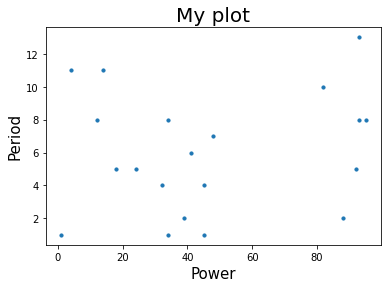

In [ ]:
# let's plot with matplotlib

# grab data from columns

#get power column data as a numpy array
col_power = main_df['Power'].to_numpy()
#get period column data as a numpy array
col_period = main_df['Period'].to_numpy()

#plot with matplotlib
plt.scatter(col_power, col_period, s= 10)
plt.title('My plot', fontsize = 20)
plt.xlabel('Power', fontsize=15); plt.ylabel('Period', fontsize=15);

### note that you can also plot using pandas directly

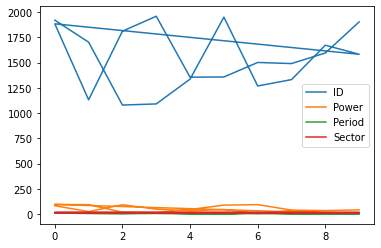

In [ ]:
#let's plot them all
main_df.plot()

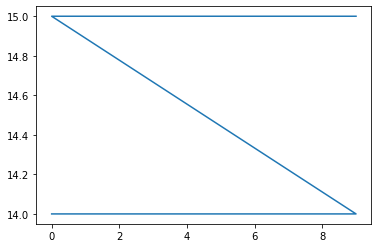

In [ ]:
#you can also plot them one at a time
main_df['Sector'].plot()

### See this link to learn more about plotting directly with pandas [link](https://pandas.pydata.org/docs/user_guide/visualization.html)

# Iterating

In [ ]:
# we will need to iterate over our targets to get the light curves for our best candidates

#select some subset data--here those with power above 60
mycut = main_df['Power'] > 60
#apply threshold cut to get data subset
data_subset = main_df[mycut]
print('data_subset:\n',data_subset) #so you can see whats going on

#select tic ids from the targets in the data subset
ids_subset = data_subset['ID'].to_numpy()
print('\nids_subset:\n',ids_subset) #so you can see whats going on

# do the iteration
print('\nStart of iteration:')#so you can see whats going on
for targetid in ids_subset:
    # you can use these to open the data with our OpenAndPlot class
    # but here I will just print the ID & what sector it comes from

    #find row in df corresponding to ID
    df_row = main_df[ main_df['ID'] == targetid]
    #select sector value for that row
    sector = df_row['Sector'].to_numpy()[0] #[0] needed b/c I want just the value not the array form
    #print result of ID & what sector it comes from
    print('Star {} comes from Sector {}'.format( targetid, sector ))


data_subset:
      ID  Power  Period  Sector
0  1921     82      10      14
2  1080     92       5      14
0  1885     95       8      15
1  1132     93       8      15
5  1358     88       2      15
6  1502     93      13      15

ids_subset:
 [1921 1080 1885 1132 1358 1502]

Start of iteration:
Star 1921 comes from Sector 14
Star 1080 comes from Sector 14
Star 1885 comes from Sector 15
Star 1132 comes from Sector 15
Star 1358 comes from Sector 15
Star 1502 comes from Sector 15
